I think one of the best known datasets for clustering in R is the `iris` dataset. That's why I'll also use it for a simple demonstration of the `kmeans` algorithm. It's shipped with base R and does not need to be read/loaded. We can simply use it.

# The data

In [4]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


The dataset is pretty simple, it has only 5 features of which the 5th one (**Species**) can be used as a target.

# Apply kmeans

In [5]:
km <- kmeans(iris[,1:4], centers=3)

In [6]:
head(km)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.006,3.428,1.462,0.246
2,6.850000,3.073684,5.742105,2.071053
3,5.901613,2.748387,4.393548,1.433871


# Visualising

In [7]:
library(GGally)

I use a few different plots for visualising because I'm not yet sure which one is the best for displaying clusters. The first one is a pairs plot using ggplot (it's located in the package `GGally`).

In [8]:
ggpairs(data.frame(iris, "clus"=factor(km$cluster)), columns=c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"),
        mapping=aes(colour=Species, shape=clus))

ERROR: Error in ggpairs(data.frame(iris, clus = factor(km$cluster)), columns = c("Sepal.Length", : could not find function "aes"


For the second I use base R plotting but it's not  more useful compared to the above plot because it does not contain more information. If you don't know the `ggplot2` library at all it is probably easier to use.

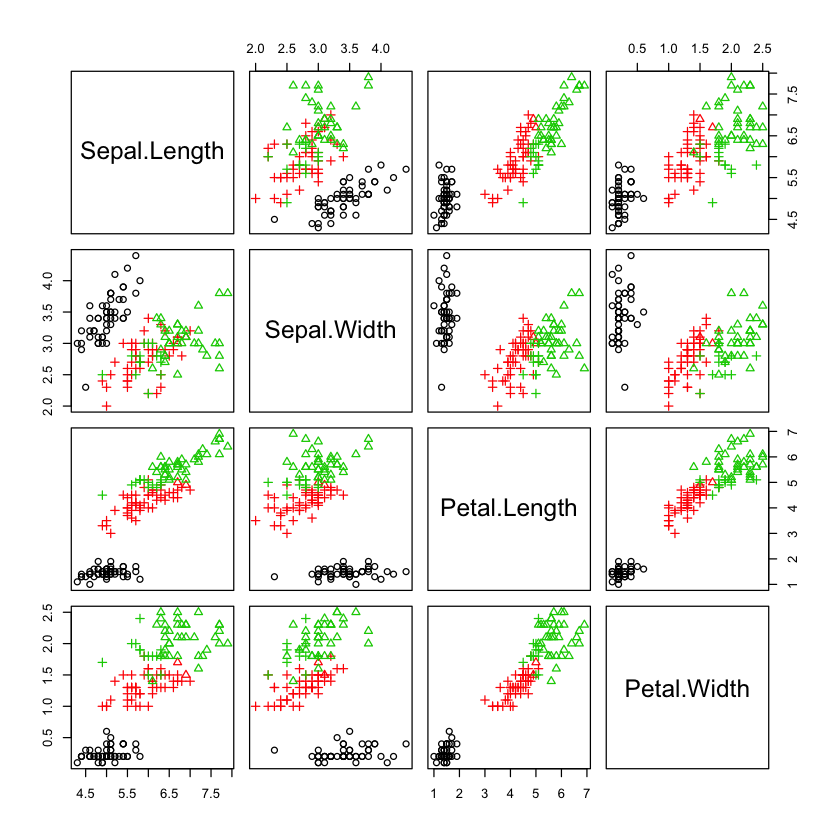

In [9]:
plot(iris[,1:4], col=iris$Species, pch=km$cluster)

The third plot was suggested in a StackExchange answer (link below in the comment). The silhoutte plot displays how similar each item is to the other cluster elements. From this image it looks like the second cluster is performing best (larger values of s are better).

In [10]:
library(cluster)

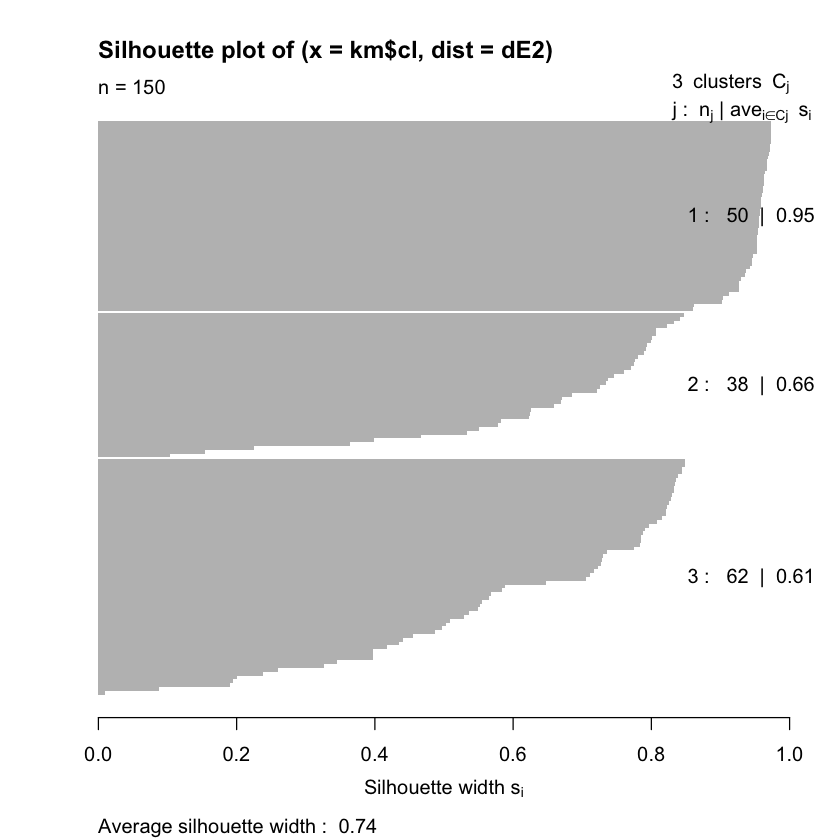

In [11]:
# http://stats.stackexchange.com/questions/31083/how-to-produce-a-pretty-plot-of-the-results-of-k-means-cluster-analysis
dissE <- daisy(iris[,1:4]) 
dE2   <- dissE^2
sk2   <- silhouette(km$cl, dE2)
plot(sk2)

# Statistics

In [12]:
cluster_list <- list()
for (i in 1:10) {
    cluster_list[[i]] <- kmeans(iris[,1:4], centers=i)
}

In [13]:
cluster_df <- NULL
for (i in 1:length(cluster_list)) {
    cluster_df <- rbind(cluster_df)
}

# Conclusion

I will not find any conclusions about this dataset because it has been clustered many, many times. I thought it was interesting what the different visualisations can do.
With the scatter plots and also the density plot (part of the first pair plot) you can see how well the classes are separable, where the clusters are and where they overlap.
The silhouette plot is also interesting, it shows that cluster 2 (corresponds to the pink points in the first plot) is the "best", which is also clear because the other two cluster overlap and the data points are not all separable with the features we have.

In [14]:
ls()

[1] "cluster_df"   "cluster_list" "dE2"          "dissE"        "i"           
[6] "km"           "sk2"